<a href="https://colab.research.google.com/github/hamza-alkaabneh/project/blob/main/project2_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/Mall_Customers.csv')
data.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
print(data.shape)
print(data.info())

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [4]:
print(data.describe())
missing_values = data.isnull().sum()
print(missing_values)

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop=None, sparse_output=False)
data_encoded = encoder.fit_transform(data[['Gender']])
scaler = StandardScaler()
scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
data_scaled = pd.DataFrame(scaled, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
data_encoded = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(['Gender']))
data = pd.concat([data_encoded, data_scaled], axis=1)
data

,Gender_Female,Gender_Male,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,1.0,-1.424569,-1.738999,-0.434801
1,0.0,1.0,-1.281035,-1.738999,1.195704
2,1.0,0.0,-1.352802,-1.700830,-1.715913
3,1.0,0.0,-1.137502,-1.700830,1.040418
4,1.0,0.0,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.0,0.0,-0.276302,2.268791,1.118061
196,1.0,0.0,0.441365,2.497807,-0.861839
197,0.0,1.0,-0.491602,2.497807,0.923953
198,0.0,1.0,-0.491602,2.917671,-1.250054


                        Gender_Male       Age  Annual Income (k$)  \
Gender_Male                1.000000  0.060867            0.056410   
Age                        0.060867  1.000000           -0.012398   
Annual Income (k$)         0.056410 -0.012398            1.000000   
Spending Score (1-100)    -0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
Gender_Male                          -0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


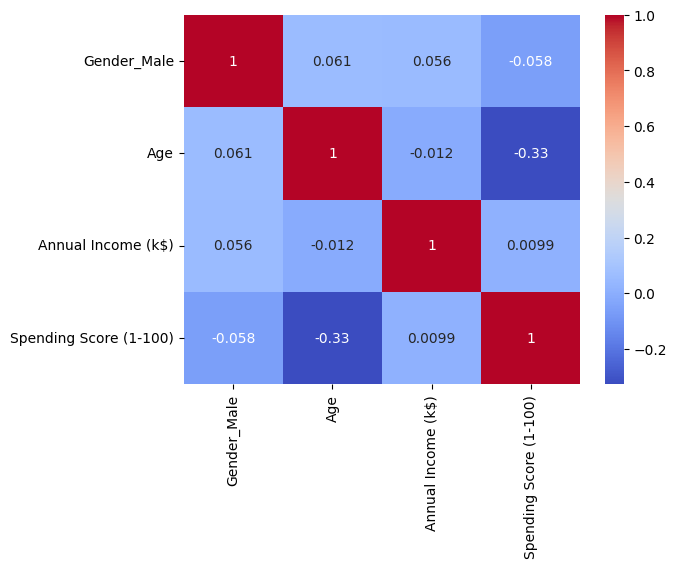

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
data_encoded = pd.get_dummies(data, drop_first=True)
correlation_matrix = data_encoded.iloc[:, 1:].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

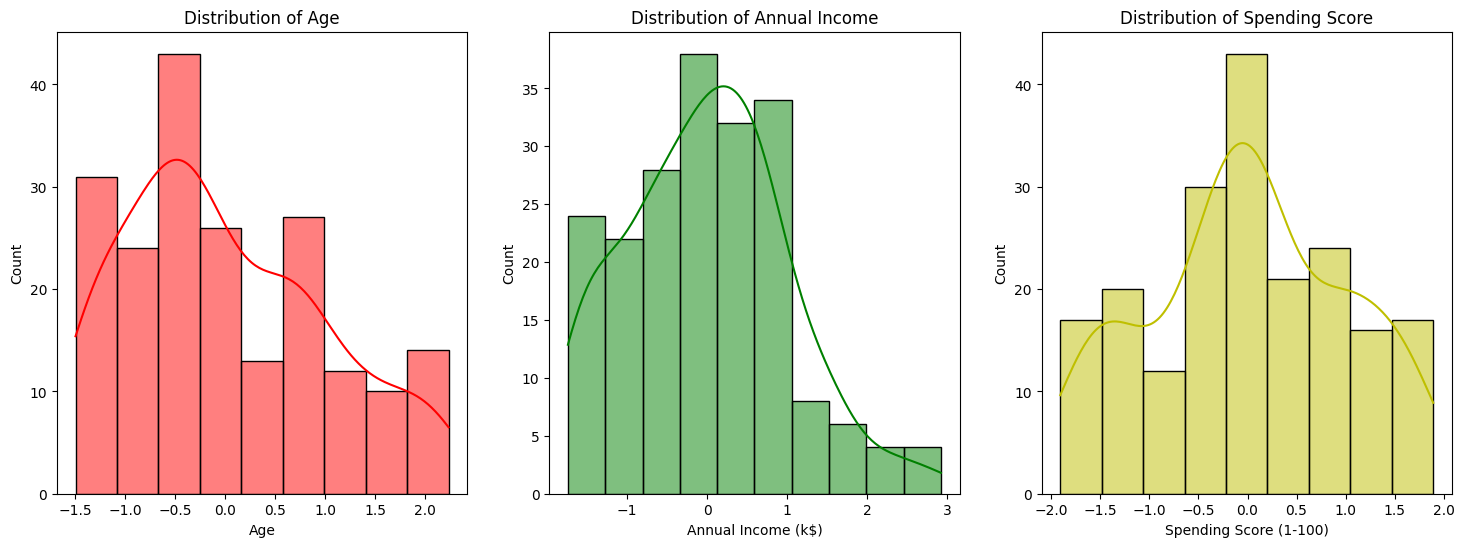

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(data['Age'], kde=True, ax=axes[0], color='r')
axes[0].set_title('Distribution of Age')

sns.histplot(data['Annual Income (k$)'], kde=True, ax=axes[1], color='g')
axes[1].set_title('Distribution of Annual Income')


sns.histplot(data['Spending Score (1-100)'], kde=True, ax=axes[2], color='y')
axes[2].set_title('Distribution of Spending Score')

plt.show()

<ipython-input-8-876eccc84860>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Gender_Male', y='Age', ax=axes[0], palette='coolwarm')
<ipython-input-8-876eccc84860>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Gender_Male', y='Annual Income (k$)', ax=axes[1], palette='coolwarm')
<ipython-input-8-876eccc84860>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Gender_Male', y='Spending Score (1-100)', ax=axes[2], palette='coolwarm', label = 'Spending Score (1-100)')


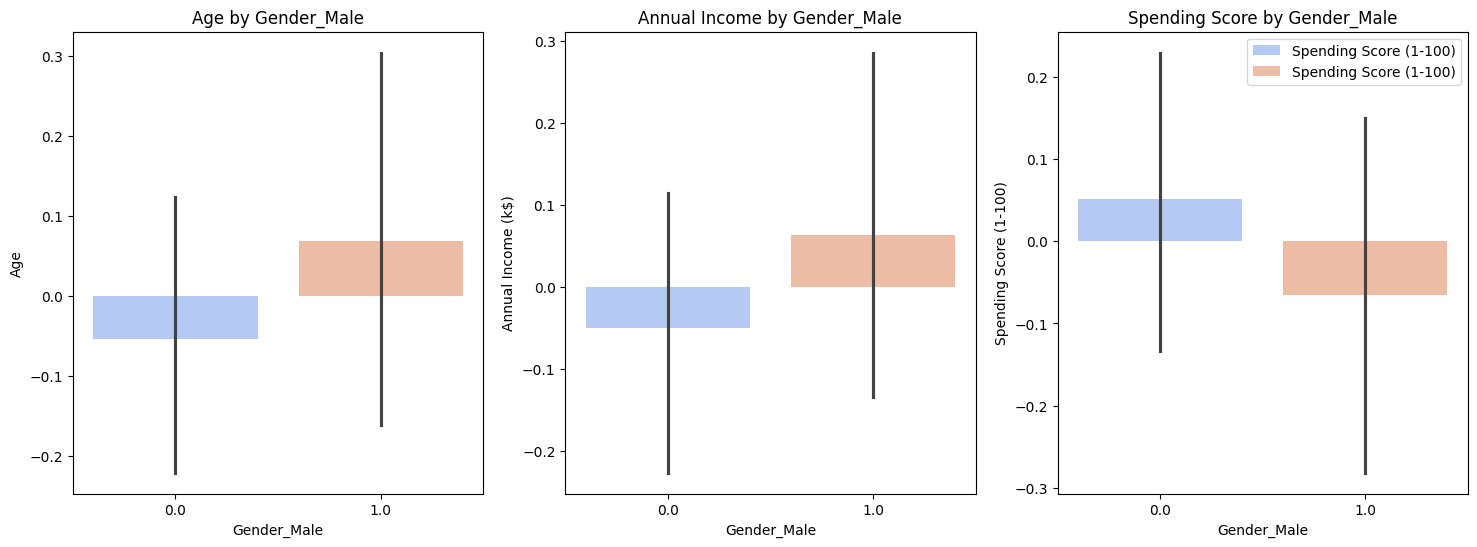

In [8]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(data=data, x='Gender_Male', y='Age', ax=axes[0], palette='coolwarm')
axes[0].set_title('Age by Gender_Male')
axes[0].set_xlabel('Gender_Male')
axes[0].set_ylabel('Age')

sns.barplot(data=data, x='Gender_Male', y='Annual Income (k$)', ax=axes[1], palette='coolwarm')
axes[1].set_title('Annual Income by Gender_Male')
axes[1].set_xlabel('Gender_Male')
axes[1].set_ylabel('Annual Income (k$)')

sns.barplot(data=data, x='Gender_Male', y='Spending Score (1-100)', ax=axes[2], palette='coolwarm', label = 'Spending Score (1-100)')
axes[2].set_title('Spending Score by Gender_Male')
axes[2].set_xlabel('Gender_Male')
axes[2].set_ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [9]:
data.columns

Index(['Gender_Female', 'Gender_Male', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<ipython-input-10-f69305d6f09b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Gender_Female', y='Age', ax=axes[0], palette='coolwarm')
<ipython-input-10-f69305d6f09b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Gender_Female', y='Annual Income (k$)', ax=axes[1], palette='coolwarm')
<ipython-input-10-f69305d6f09b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Gender_Female', y='Spending Score (1-100)', ax=axes[2], palette='coolwarm', label = 'Spending Score (1-100)')


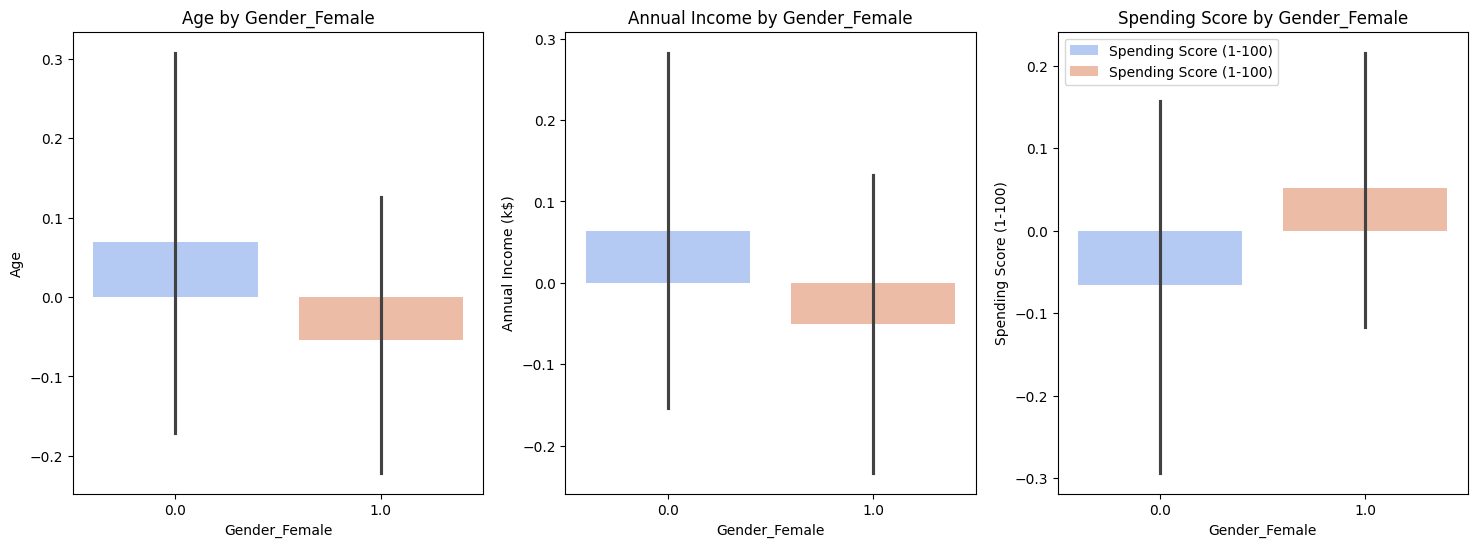

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(data=data, x='Gender_Female', y='Age', ax=axes[0], palette='coolwarm')
axes[0].set_title('Age by Gender_Female')
axes[0].set_xlabel('Gender_Female')
axes[0].set_ylabel('Age')

sns.barplot(data=data, x='Gender_Female', y='Annual Income (k$)', ax=axes[1], palette='coolwarm')
axes[1].set_title('Annual Income by Gender_Female')
axes[1].set_xlabel('Gender_Female')
axes[1].set_ylabel('Annual Income (k$)')

sns.barplot(data=data, x='Gender_Female', y='Spending Score (1-100)', ax=axes[2], palette='coolwarm', label = 'Spending Score (1-100)')
axes[2].set_title('Spending Score by Gender_Female')
axes[2].set_xlabel('Gender_Female')
axes[2].set_ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

<ipython-input-11-5deaeaf931d9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender_Male', y='Annual Income (k$)', palette='coolwarm')


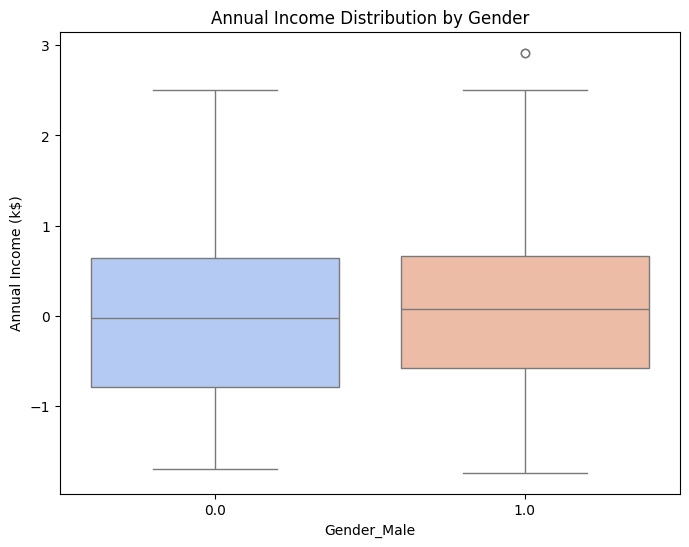

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Gender_Male', y='Annual Income (k$)', palette='coolwarm')
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Gender_Male')
plt.ylabel('Annual Income (k$)')
plt.show()


In [12]:
from sklearn.decomposition import PCA
pca = PCA()
dataPCA = pca.fit_transform(data.iloc[ : , 1:])
columns = []
for i in range(1, len(data.columns)):
    columns.append('PC' + str(i))
dataPCA = pd.DataFrame(dataPCA , columns=columns)
dataPCA

,PC1,PC2,PC3,PC4
0,-0.600438,-1.737179,-1.322247,0.655372
1,-1.649886,-1.789124,-0.067789,0.693393
2,0.315381,-1.692772,-2.179818,-0.379872
3,-1.477989,-1.781317,-0.078518,-0.314797
4,-0.060545,-1.678691,-0.688083,-0.370265
...,...,...,...,...
195,-1.101819,2.201867,0.605820,-0.488031
196,0.792047,2.517450,-0.285595,-0.568992
197,-1.089706,2.470818,0.320120,0.503117
198,0.425949,2.964343,-1.215005,0.430948


In [13]:
variance = pca.explained_variance_ratio_
print("variance" , variance)

for i , vv in enumerate(variance):
  print(f"component {i+1} : {vv}")

variance [0.4095285  0.3081674  0.20723465 0.07506945]
component 1 : 0.4095285048870927
component 2 : 0.30816739739767257
component 3 : 0.20723464806492578
component 4 : 0.07506944965030894


In [14]:
cumulative_var = np.cumsum(variance)

for i , vv in enumerate(cumulative_var):
  print(f"component {i+1} : {vv}")
var90 = np.argmax(cumulative_var >= 0.9) + 1
var95 = np.argmax(cumulative_var >= 0.95) + 1
print(f"Number of components to retain 90% variance: {var90}")
print(f"Number of components to retain 95% variance: {var95}")

component 1 : 0.4095285048870927
component 2 : 0.7176959022847653
component 3 : 0.9249305503496911
component 4 : 1.0
Number of components to retain 90% variance: 3
Number of components to retain 95% variance: 4


In [15]:
pca = PCA(n_components=3)
dataPCA = pca.fit_transform(data.iloc[:, 1:])

columns = ['PC1', 'PC2', 'PC3']
dataPCA = pd.DataFrame(dataPCA, columns=columns)

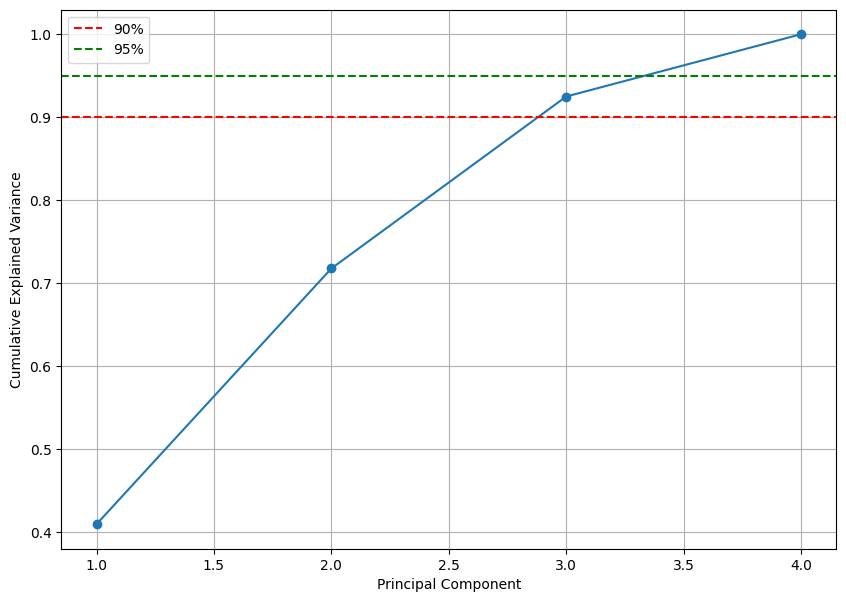

In [16]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(variance) + 1), cumulative_var, marker='o', linestyle='-')
plt.axhline(y=0.90 , color='r', linestyle='--', label='90%')
plt.axhline(y=0.95, color='g', linestyle='--', label='95%')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()

<ipython-input-17-3ac6f1af38ad>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(dataPCA['PC1'], dataPCA['PC2'], cmap='coolwarm', alpha=0.7, edgecolors ='r')


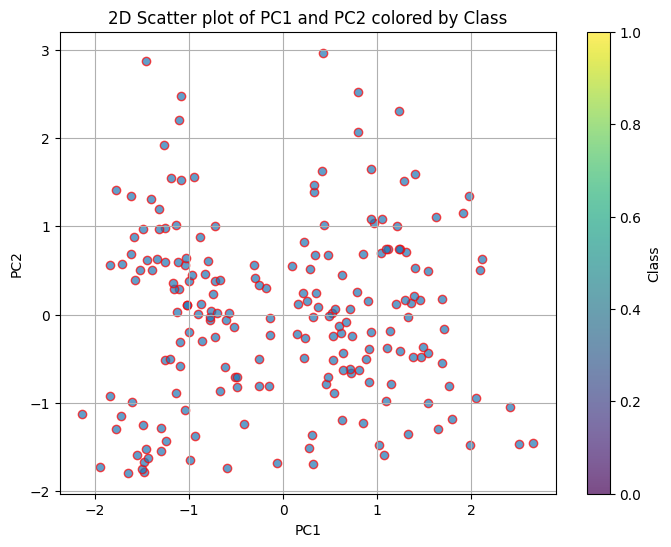

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(dataPCA['PC1'], dataPCA['PC2'], cmap='coolwarm', alpha=0.7, edgecolors ='r')
plt.title('2D Scatter plot of PC1 and PC2 colored by Class')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()


In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=20,n_components=2, random_state=42)
dtsne = tsne.fit_transform(data.iloc[ : , 1:])
datatsne = pd.DataFrame(dtsne, columns=['dimentions 1', 'dimentions 2'])

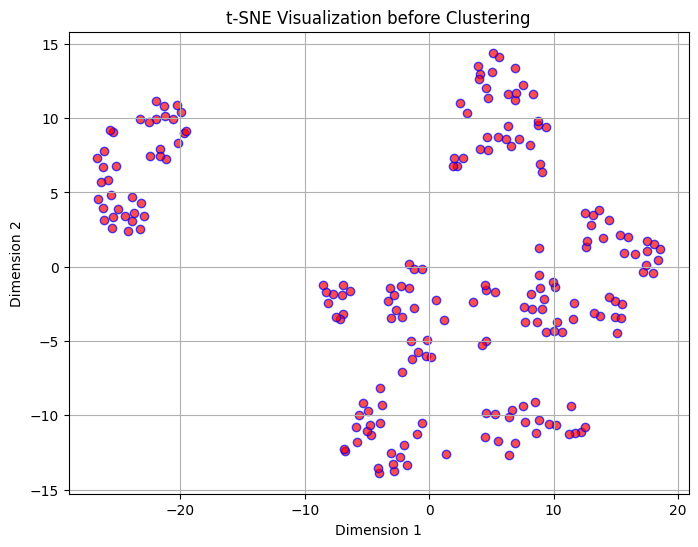

In [19]:

plt.figure(figsize=(8,6))
plt.scatter(datatsne['dimentions 1'], datatsne['dimentions 2'], c='red', edgecolors='blue', alpha=0.7)
plt.title('t-SNE Visualization before Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Explained Variance by Each Principal Component')

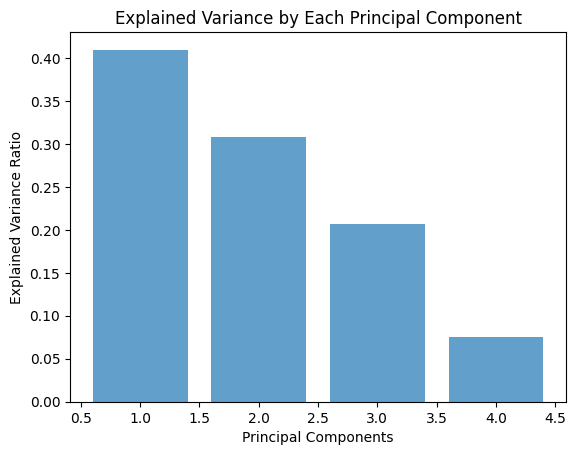

In [20]:
plt.bar(range(1, len(variance) + 1), variance, alpha=0.7, align='center', label='Individual Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')

In [21]:
from sklearn.cluster import KMeans
kmeansPCA = KMeans(n_clusters= 4, random_state=42)
kmeansPCA.fit(dataPCA)
kmeans = KMeans(n_clusters= 4 , random_state =42)
kmeans.fit(data.iloc[ : , 1:])

KMeans(n_clusters=4, random_state=42)

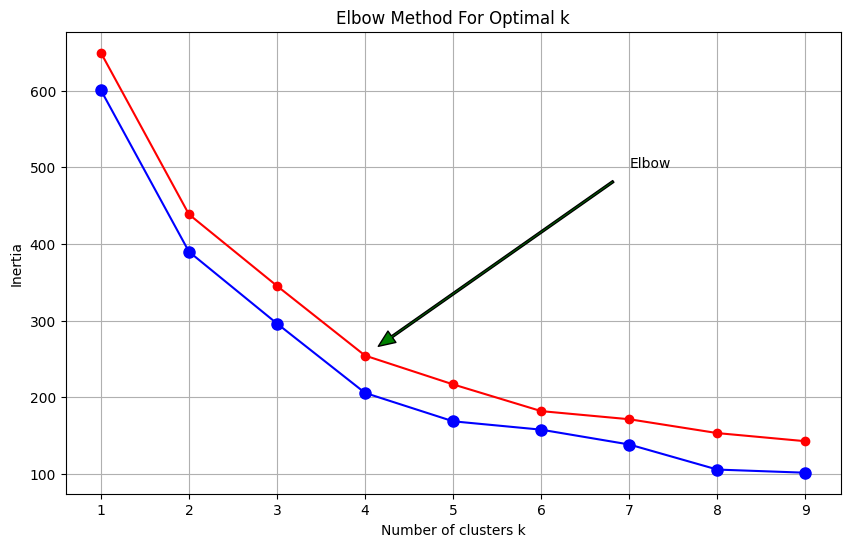

In [22]:
inertiaspca = []
inertias = []
K_range = range(1, 10)

for k in K_range:
    #pca
    kmeansPCA = KMeans(n_clusters=k, random_state=42)
    kmeansPCA.fit(dataPCA)
    inertiaspca.append(kmeansPCA.inertia_)
    #الاصلي
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data.iloc[:, 1:])
    inertias.append(kmeans.inertia_)

plt.figure( figsize=(10,6))
plt.plot(K_range, inertiaspca, 'bo-', markersize=8)
plt.plot(K_range, inertias, 'ro-', label='data Original')

plt.annotate('Elbow',xy=(4, inertias[3]),xytext=(7, 500), arrowprops=dict(facecolor='g', shrink=0.05, width=1.5, headwidth=10))

plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()
from sklearn.metrics import silhouette_score
silhouettepca = []
silhouette = []

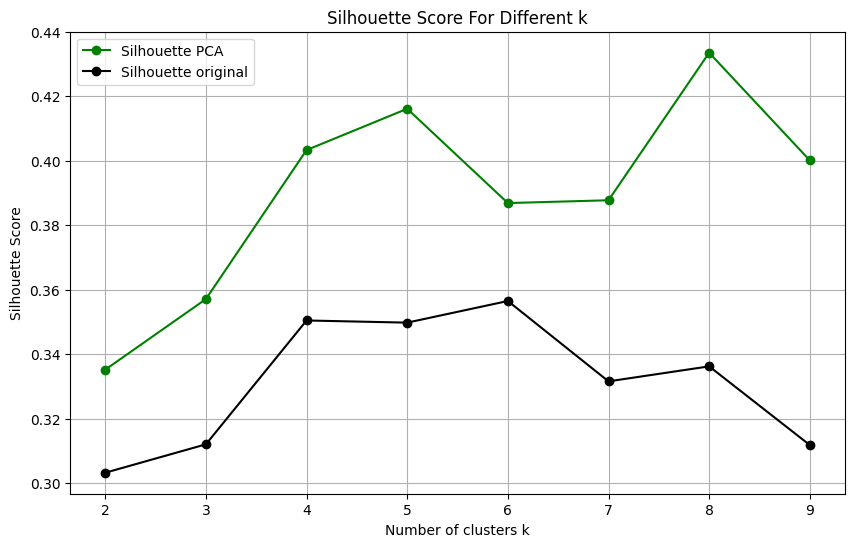

In [23]:

from sklearn.metrics import silhouette_score
silhouettepca = []
silhouette = []

for k in range(2, 10):
    kmeansp = KMeans(n_clusters=k, random_state=42)
    labelspca = kmeansp.fit_predict(dataPCA)
    score_pca = silhouette_score(dataPCA, labelspca)
    silhouettepca.append(score_pca)

    kmeans_orig = KMeans(n_clusters=k, random_state=42)
    labels= kmeans_orig.fit_predict(data.iloc[:, 1:])
    score_orig = silhouette_score(data.iloc[:, 1:], labels)
    silhouette.append(score_orig)

plt.figure(figsize=(10,6))
plt.plot(range(2, 10), silhouettepca, 'go-', label='Silhouette PCA')
plt.plot(range(2, 10), silhouette, 'ko-', label='Silhouette original')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Different k')
plt.legend()
plt.grid()
plt.show()

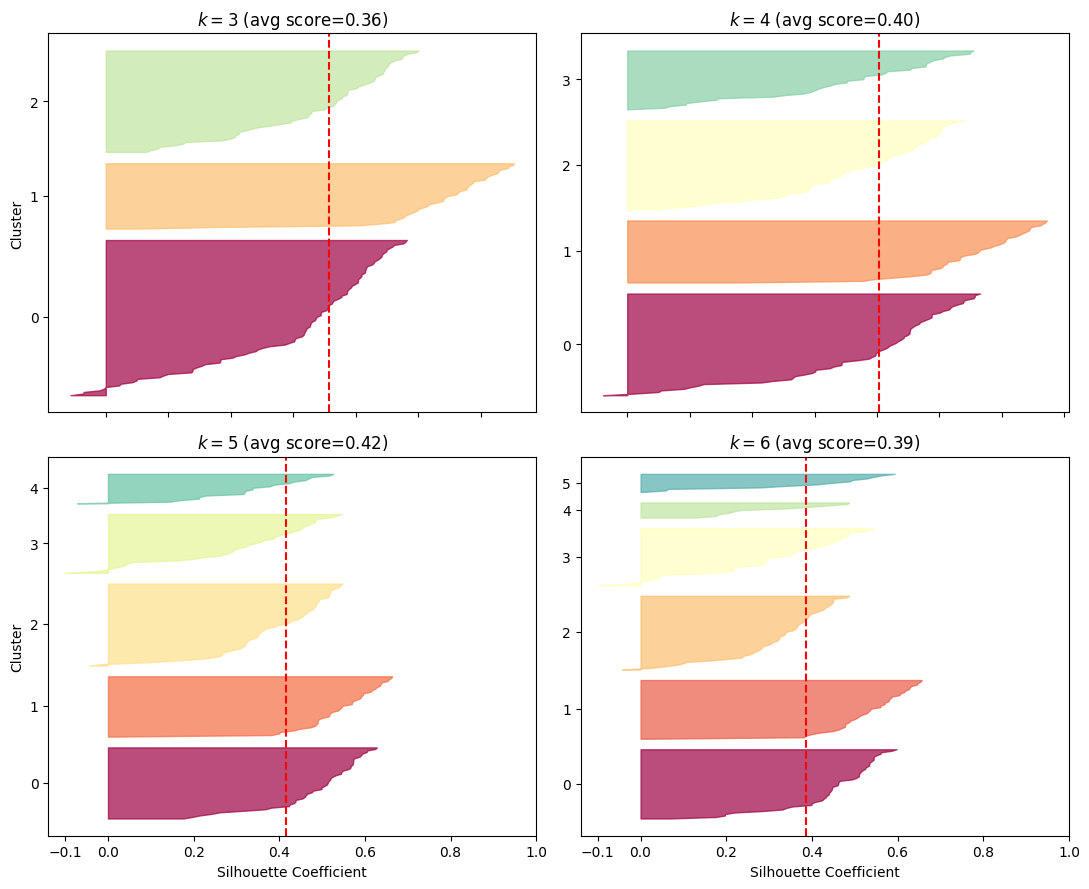

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
X = dataPCA.values
k_values = [3, 4, 5, 6]
kmeans_per_k = []


for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    kmeans_per_k.append(model)

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k]

plt.figure(figsize=(11, 9))

for idx, k in enumerate(k_values):
    plt.subplot(2, 2, idx + 1)

    labels = kmeans_per_k[idx].labels_
    silhouette_vals = silhouette_samples(X, labels)

    padding = len(X) // 30
    pos = padding
    ticks = []

    for i in range(k):
        cluster_silhouette_vals = silhouette_vals[labels == i]
        cluster_silhouette_vals.sort()

        color = plt.cm.Spectral(float(i) / k)
        plt.fill_betweenx(np.arange(pos, pos + len(cluster_silhouette_vals)),
                          0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(cluster_silhouette_vals) // 2)
        pos += len(cluster_silhouette_vals) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[idx], color="red", linestyle="--")
    plt.title(f"$k={k}$ (avg score={silhouette_scores[idx]:.2f})")

plt.tight_layout()
plt.show()


In [25]:
from sklearn.cluster import MiniBatchKMeans

minibatchpca = MiniBatchKMeans(n_clusters=4, n_init=5, random_state=42)
minibatchpca.fit(dataPCA)
minibatch = MiniBatchKMeans(n_clusters=4, n_init=5, random_state=42)
minibatch.fit(data)

MiniBatchKMeans(n_clusters=4, n_init=5, random_state=42)

In [26]:
import time
k = 5
start = time.time()
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(dataPCA)
time_kmeans = time.time() - start

# Mini-Batch K-Means
start = time.time()
mbk = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)
mbk.fit(dataPCA)
time_mbk = time.time() - start

print(f" K-Means take time: {time_kmeans:.4f} seconds")
print(f"Mini-Batch K-Means take time: {time_mbk:.4f} seconds")


 K-Means take time: 0.0227 seconds
Mini-Batch K-Means take time: 0.0062 seconds


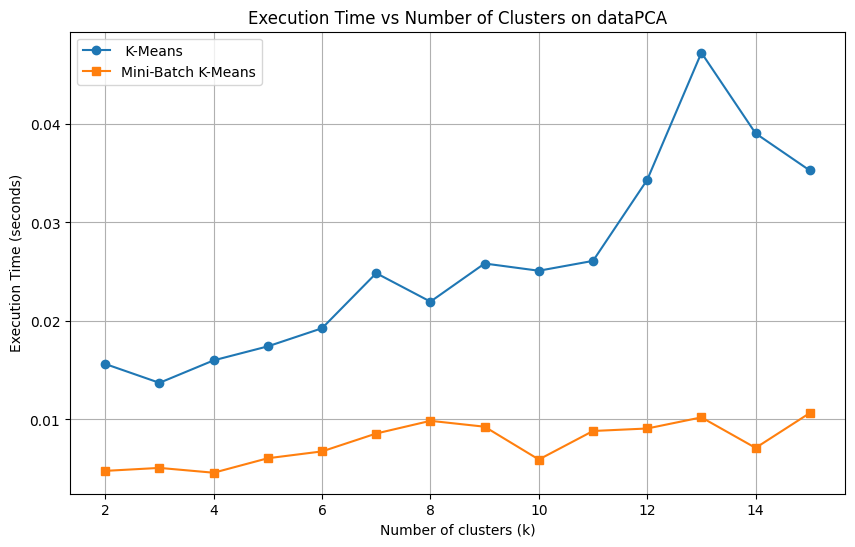

In [27]:
nembre_k = range(2, 16)
time_standard = []
time_minibatch = []

for k in nembre_k:
    start = time.time()
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(dataPCA)
    time_standard.append(time.time() - start)

    start = time.time()
    mbk = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)
    mbk.fit(dataPCA)
    time_minibatch.append(time.time() - start)

plt.figure(figsize=(10,6))
plt.plot(nembre_k, time_standard, marker='o', label=' K-Means')
plt.plot(nembre_k, time_minibatch, marker='s', label='Mini-Batch K-Means')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Clusters on dataPCA')
plt.legend()
plt.grid(True)
plt.show()


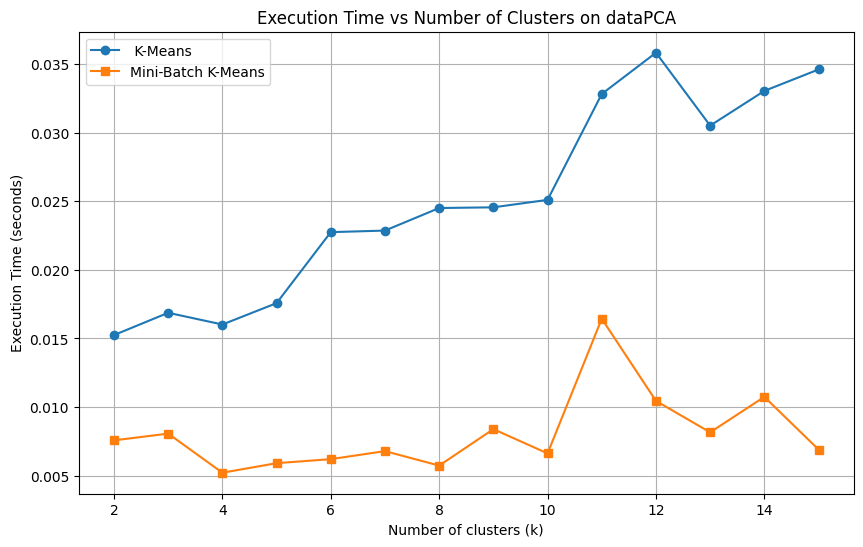

In [28]:
nembre_k = range(2, 16)
time_standard = []
time_minibatch = []

for k in nembre_k:
    start = time.time()
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data)
    time_standard.append(time.time() - start)

    start = time.time()
    mbk = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)
    mbk.fit(data)
    time_minibatch.append(time.time() - start)

plt.figure(figsize=(10,6))
plt.plot(nembre_k, time_standard, marker='o', label=' K-Means')
plt.plot(nembre_k, time_minibatch, marker='s', label='Mini-Batch K-Means')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Number of Clusters on dataPCA')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
import time
k = 4
start = time.time()
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(data)
time_kmeans = time.time() - start
#MBK
start = time.time()
mbk = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)
mbk.fit(data)
time_mbk = time.time() - start

print(f" K-Means take time: {time_kmeans:.4f} seconds")
print(f"Mini-Batch K-Means take time: {time_mbk:.4f} seconds")


 K-Means take time: 0.0181 seconds
Mini-Batch K-Means take time: 0.0052 seconds


In [30]:
import tracemalloc
from sklearn.cluster import KMeans, MiniBatchKMeans

k = 5


tracemalloc.start()
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(dataPCA)
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
print(f" K-Means memory usage: Current = {current / 10**6:.2f} MB, Peak = {peak / 10**6:.2f} MB")

tracemalloc.start()
mbk = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)
mbk.fit(dataPCA)
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
print(f"Mini-Batch K-Means memory usage: Current = {current / 10**6:.2f} MB, Peak = {peak / 10**6:.2f} MB")


 K-Means memory usage: Current = 0.02 MB, Peak = 0.05 MB
Mini-Batch K-Means memory usage: Current = 0.01 MB, Peak = 0.04 MB


In [31]:
tracemalloc.start()
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(data)
current_k, peak_k = tracemalloc.get_traced_memory()
tracemalloc.stop()
print(f"K-Means memory usage: Current = {current_k / 10**6:.2f} MB, Peak = {peak_k / 10**6:.2f} MB")

tracemalloc.start()
mbk = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=42)
mbk.fit(data)
current_mbk, peak_mbk = tracemalloc.get_traced_memory()
tracemalloc.stop()

print(f"Mini-Batch K-Means memory usage: Current = {current_mbk / 10**6:.2f} MB, Peak = {peak_mbk / 10**6:.2f} MB")


K-Means memory usage: Current = 0.02 MB, Peak = 0.05 MB
Mini-Batch K-Means memory usage: Current = 0.05 MB, Peak = 0.06 MB
